目标检测：在图像中标注目标的位置

In [10]:
import torch
import matplotlib.pyplot as plt

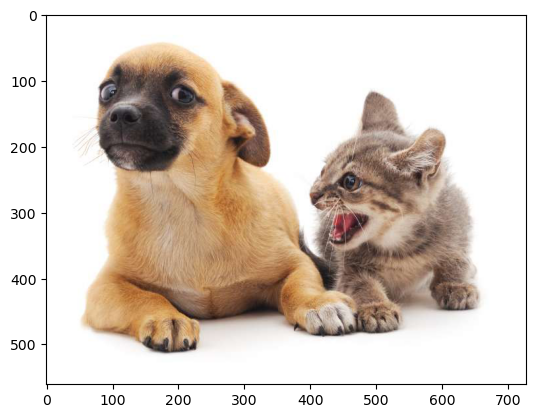

In [11]:
img = plt.imread('../img/catdog.jpg')
plt.imshow(img)

In [12]:
# 1. (左上，右下)
# 2. (中间，宽，高)
def box_corner_to_center(boxes):
  # 1 → 2
  x1, y1, x2, y2 = boxes[:, 0], boxes[:, 1], boxes[:, 2],boxes[:,3]
  cx = (x1 + x2) /2
  cy = (y1 + y2) /2
  w = x2 - x1
  h = y2 - y1
  boxes = torch.stack((cx, cy, w, h), axis = -1)
  return boxes

def box_center_to_corner(boxes):
  # 2 → 1
  cx, cy, w, h = boxes[:, 0], boxes[:, 1], boxes[:, 2],boxes[:,3]
  x1 = cx - 0.5 * w
  x2 = cx + 0.5 * w
  y1 = cy - 0.5 * h
  y2 = cy + 0.5 * h
  boxes = torch.stack((x1, y1, x2, y2), axis = -1)
  return boxes

In [13]:
# 坐标原点在左上角
dog_bbox , cat_bbox = [60.0, 45.0, 378.0, 516.0], [400.0,112.0,655.0, 493.0]
boxes = torch.tensor((dog_bbox, cat_bbox))
# 测一下转换函数对不对
box_center_to_corner(box_corner_to_center(boxes)) == boxes

tensor([[True, True, True, True],
        [True, True, True, True]])

In [14]:
def bbox_to_rect(bbox, color):
  # 将边界框(左上x，左上y，右下x, 右下y)格式转换成matplotlib格式
  # ((左上x,左上y)，宽，高)
  return plt.Rectangle(
    xy=(bbox[0], bbox[1]), width=bbox[2] - bbox[0], height=bbox[3] - bbox[1],
    fill=False, edgecolor=color, linewidth=2
  )

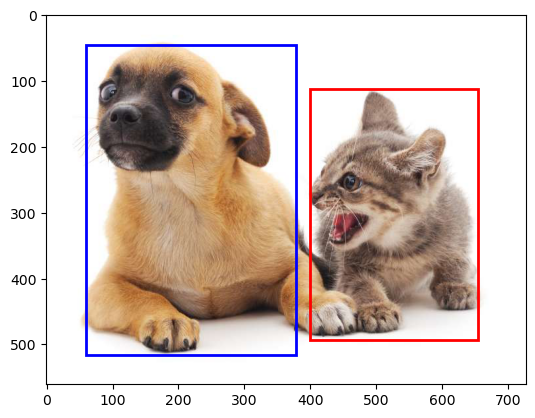

In [15]:
fig = plt.imshow(img)
fig.axes.add_patch(bbox_to_rect(dog_bbox, 'blue'))
fig.axes.add_patch(bbox_to_rect(cat_bbox, 'red'))